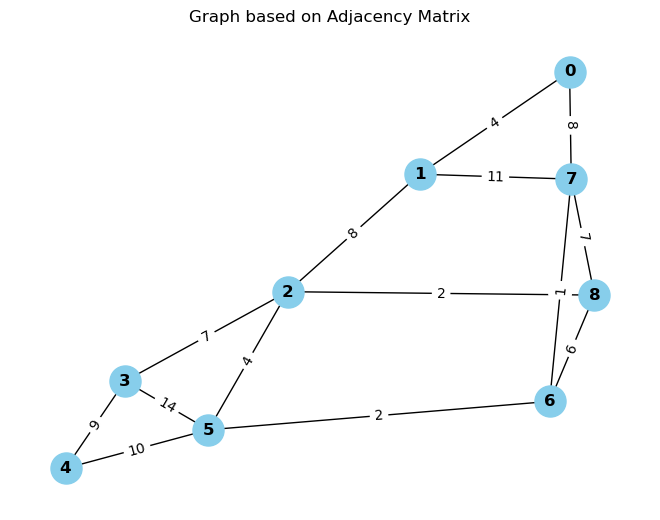

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Example adjacency matrix representing the graph
# 0 indicates no connection between nodes
adjacency_matrix = np.array([
    [0, 4, 0, 0, 0, 0, 0, 8, 0],
    [4, 0, 8, 0, 0, 0, 0, 11, 0],
    [0, 8, 0, 7, 0, 4, 0, 0, 2],
    [0, 0, 7, 0, 9, 14, 0, 0, 0],
    [0, 0, 0, 9, 0, 10, 0, 0, 0],
    [0, 0, 4, 14, 10, 0, 2, 0, 0],
    [0, 0, 0, 0, 0, 2, 0, 1, 6],
    [8, 11, 0, 0, 0, 0, 1, 0, 7],
    [0, 0, 2, 0, 0, 0, 6, 7, 0]
])

# Create a NetworkX graph from the adjacency matrix
G = nx.from_numpy_array(adjacency_matrix)

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title('Graph based on Adjacency Matrix')
plt.show()


In [7]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra

# Example adjacency matrix representing the graph
# 0 indicates no connection between nodes
graph = np.array([
    [0, 4, 0, 0, 0, 0, 0, 8, 0],
    [4, 0, 8, 0, 0, 0, 0, 11, 0],
    [0, 8, 0, 7, 0, 4, 0, 0, 2],
    [0, 0, 7, 0, 9, 14, 0, 0, 0],
    [0, 0, 0, 9, 0, 10, 0, 0, 0],
    [0, 0, 4, 14, 10, 0, 2, 0, 0],
    [0, 0, 0, 0, 0, 2, 0, 1, 6],
    [8, 11, 0, 0, 0, 0, 1, 0, 7],
    [0, 0, 2, 0, 0, 0, 6, 7, 0]
])

# Convert the numpy array to a CSR matrix
csr_graph = csr_matrix(graph)

# Find shortest paths from node 0 using csr_matrix and scipy's dijkstra
start_node = 0
distances, predecessors = dijkstra(csr_graph, return_predecessors=True, indices=start_node)

print("Shortest distances from node", start_node)
for i, distance in enumerate(distances):
    print(f"Node {i}: Distance = {distance}")

# If you need the shortest path to a specific node, for example, node 4:
end_node = 4
path = []
while end_node != start_node:
    path.append(end_node)
    end_node = predecessors[end_node]
path.append(start_node)
path.reverse()
print("Shortest path to node 4:", path)


Shortest distances from node 0
Node 0: Distance = 0.0
Node 1: Distance = 4.0
Node 2: Distance = 12.0
Node 3: Distance = 19.0
Node 4: Distance = 21.0
Node 5: Distance = 11.0
Node 6: Distance = 9.0
Node 7: Distance = 8.0
Node 8: Distance = 14.0
Shortest path to node 4: [0, 7, 6, 5, 4]


In [4]:
print(distances)

[ 0.  4. 12. 19. 21. 11.  9.  8. 14.]


In [8]:
from scipy.sparse.csgraph import floyd_warshall

# Example adjacency matrix representing the graph
# 0 indicates no connection between nodes
adjacency_matrix = np.array([
    [0, 4, 0, 0, 0, 0, 0, 8, 0],
    [4, 0, 8, 0, 0, 0, 0, 11, 0],
    [0, 8, 0, 7, 0, 4, 0, 0, 2],
    [0, 0, 7, 0, 9, 14, 0, 0, 0],
    [0, 0, 0, 9, 0, 10, 0, 0, 0],
    [0, 0, 4, 14, 10, 0, 2, 0, 0],
    [0, 0, 0, 0, 0, 2, 0, 1, 6],
    [8, 11, 0, 0, 0, 0, 1, 0, 7],
    [0, 0, 2, 0, 0, 0, 6, 7, 0]
])

# Apply Floyd-Warshall algorithm to find all pairs shortest paths
# Use `directed=False` for undirected graphs
all_pairs_shortest_paths = floyd_warshall(adjacency_matrix, directed=False)

# Print the matrix showing all pairs shortest paths
print("All pairs shortest paths:")
print(all_pairs_shortest_paths)


All pairs shortest paths:
[[ 0.  4. 12. 19. 21. 11.  9.  8. 14.]
 [ 4.  0.  8. 15. 22. 12. 12. 11. 10.]
 [12.  8.  0.  7. 14.  4.  6.  7.  2.]
 [19. 15.  7.  0.  9. 11. 13. 14.  9.]
 [21. 22. 14.  9.  0. 10. 12. 13. 16.]
 [11. 12.  4. 11. 10.  0.  2.  3.  6.]
 [ 9. 12.  6. 13. 12.  2.  0.  1.  6.]
 [ 8. 11.  7. 14. 13.  3.  1.  0.  7.]
 [14. 10.  2.  9. 16.  6.  6.  7.  0.]]


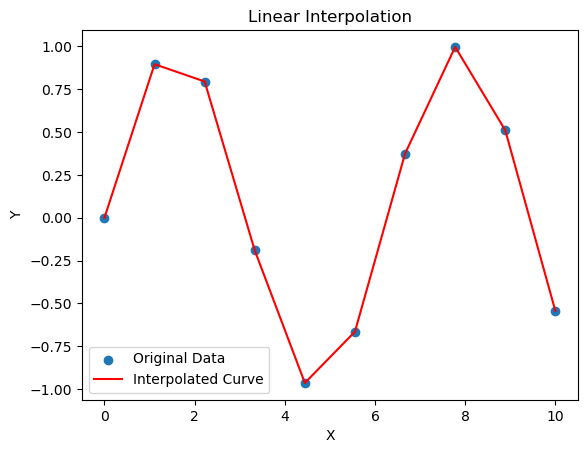

In [9]:
from scipy.interpolate import interp1d

# Example data points
x = np.linspace(0, 10, 10)
y = np.sin(x)

# Create an interpolation function using linear interpolation
linear_interp = interp1d(x, y, kind='linear')

# New x values for interpolation
x_new = np.linspace(0, 10, 100)

# Interpolate the y values for the new x values
y_new = linear_interp(x_new)

# Plotting original data and interpolated curve
plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, label='Interpolated Curve', color='red')
plt.legend()
plt.title('Linear Interpolation')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
